In [1]:


import deepchem as dc
from deepchem.models.torch_models import MATModel
from deepchem.data.data_loader import DataLoader
from deepchem.feat import MATFeaturizer
import matplotlib.pyplot as plt


import pandas as pd

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
/home/alexi/anaconda3/envs/dd4/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
#pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu
#pip install pyg-lib torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
#pip install --pre deepchem

#conda install matplotlib

In [3]:


featurizer = dc.feat.MATFeaturizer()
# Let us now take an example array of smile strings and featurize it.
smile_string = ["CCC"]
output = featurizer.featurize(smile_string)
print(type(output[0]))
print(output[0].node_features)
print(output[0].adjacency_matrix)
print(output[0].distance_matrix)



<class 'deepchem.feat.molecule_featurizers.mat_featurizer.MATEncoding'>
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[1.e+06 1.e+06 1.e+06 1.e+06]
 [1.e+06 0.e+00 2.e+00 1.e+00]
 [1.e+06 2.e+00 0.e+00 1.e+00]
 [1.e+06 1.e+00 1.e+00 0.e+00]]


In [4]:


# tasks, dataset, transformers = dc.molnet.load_freesolv()
# train_dataset, val_dataset, test_dataset = dataset
# train_smiles = train_dataset.ids
# val_smiles = val_dataset.ids



['y']

In [35]:

df = pd.read_csv("activity_data_original.csv")

df = df[df['r_avg_IC50'].notna()]



df.to_csv("activity_data.csv")
#remove ~
# clean_df = df.
# dataset = [featurizer.featurizer([string]) for string in clean_df["SMILES"]]


# # print(df["SMILES"])


# train_dataset, val_dataset, test_dataset = pd.read_csv("activity_data.csv"), pd.read_csv("activity_data_val.csv"), pd.read_csv("activity_data_test.csv")


In [36]:
print(df["r_avg_IC50"])

657      0.174061
859     79.742781
902     17.559930
949     22.512335
951     15.771923
          ...    
2054    43.847051
2055    45.311923
2056    49.329213
2060    14.641091
2061    45.077469
Name: r_avg_IC50, Length: 663, dtype: float64


In [37]:

from typing import List, Optional, Tuple, Any, Sequence, Union, Iterator


from deepchem.utils.typing import OneOrMany
from deepchem.utils.data_utils import load_image_files, load_csv_files, load_json_files, load_sdf_files, unzip_file
from deepchem.feat import UserDefinedFeaturizer, Featurizer
from deepchem.data import Dataset, DiskDataset, NumpyDataset, ImageDataset
from deepchem.feat.molecule_featurizers import OneHotFeaturizer
from deepchem.utils.genomics_utils import encode_bio_sequence


In [39]:



loader = dc.data.CSVLoader(["r_avg_IC50"], feature_field="SMILES", featurizer=featurizer)
train_dataset = loader.create_dataset("activity_data.csv", shard_size=100)




loader = dc.data.CSVLoader(["r_avg_IC50"], feature_field="SMILES", featurizer=featurizer)
val_dataset = loader.create_dataset("activity_data_val.csv", shard_size=100)



loader = dc.data.CSVLoader(["r_avg_IC50"], feature_field="SMILES", featurizer=featurizer)
test_dataset = loader.create_dataset("activity_data_test.csv", shard_size=100)

[18:46:56] UFFTYPER: Unrecognized atom type: Au6+3 (1)
[18:46:56] UFFTYPER: Unrecognized atom type: Au6+3 (1)
[18:46:56] UFFTYPER: Unrecognized atom type: Au6+3 (16)
[18:46:56] UFFTYPER: Unrecognized atom type: Au6+3 (16)
[18:46:56] UFFTYPER: Unrecognized atom type: Au6+3 (3)
[18:46:56] UFFTYPER: Unrecognized atom type: Au6+3 (3)


In [40]:


# bind_dataset = BindDataloader(list('y'),featurizer)
# bind_dataset.create_dataset(df["SMILES"])


In [41]:


device = 'cpu'
model = MATModel(device = device,batch_size = 10)




In [42]:
losses, val_losses = [], []

In [49]:

%%time
max_epochs = 100



for epoch in range(max_epochs):
    loss = model.fit(train_dataset, nb_epoch = 1, max_checkpoints_to_keep = 1, all_losses = losses)
    metric = dc.metrics.Metric(dc.metrics.score_function.rms_score)
    val_losses.append(model.evaluate(val_dataset, metrics = [metric])['rms_score']**2)

# The warnings are not relevant to this tutorial thus we can safely skip them.



/home/alexi/anaconda3/envs/dd4/lib/python3.8/site-packages/deepchem/models/torch_models/mat.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_features = torch.tensor(data[0]).float()
/home/alexi/anaconda3/envs/dd4/lib/python3.8/site-packages/deepchem/models/torch_models/mat.py:166: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adjacency_matrix = torch.tensor(data[1]).float()
/home/alexi/anaconda3/envs/dd4/lib/python3.8/site-packages/deepchem/models/torch_models/mat.py:167: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  distance_ma

CPU times: user 5h 56min 41s, sys: 25min 32s, total: 6h 22min 13s
Wall time: 1h 36min 9s


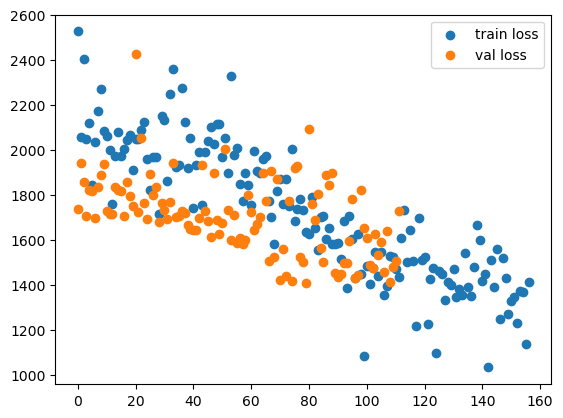

In [50]:
f, ax = plt.subplots()
ax.scatter(range(len(losses)), losses, label='train loss')
ax.scatter(range(len(val_losses)), val_losses, label='val loss')
plt.legend(loc='upper right')

In [52]:

# We will be predicting the enthalpy value for the smile string we featurized earlier in the MATFeaturizer section.
model.predict_on_batch(output)



array([[151.0556]], dtype=float32)